#DATA ANALYSIS OF AEROFIT DATASET
**Please note that detailed report with findings and insights is also attached**

In [1]:
pip install jupyter_dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dash
from dash import dcc
from dash import html
from jupyter_dash import JupyterDash

from dash.dependencies import Input, Output
import plotly.express as px


In [3]:
df = pd.read_csv("/content/aerofit_treadmill_data.csv")

In [4]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.shape # 180 rows and 9 columns

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isna() #there are no null values

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
df.describe(include="object") # There are 3 unique values in product categories which are 3 treadmill models, 2 unique categories in Gender, similarly 2 unique values in martital status.

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
175,False
176,False
177,False
178,False


In [12]:
df.duplicated().sum()

0

In [13]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are three models of the product
KP281
KP481
KP781

 **3.Non-Graphical Analysis:  
 Value Counts for all categorical features  
 Unique Attributes for all categorical features**  


In [14]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In dataframe KP281 is mentioned 80 times which means this product is most popular, KP281 is mentioned 60 time and KP781 is least popular with 40 times.

In [15]:
df["Gender"].value_counts()

,count
Gender,
Male,104
Female,76


Machiens have been bought 104 times by Male and 76 times by Females

In [16]:
df["Age"].value_counts()

,count
Age,
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7


Products mostly have been purchased by Age bracket of 25 to 28 years

In [17]:
df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


Products are more popular among partnered people

In [18]:
df['Age'].unique() # Unique attributeso f Age

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [19]:
df['Gender'].unique() # Unique attributes of Gender

array(['Male', 'Female'], dtype=object)

In [20]:
df['MaritalStatus'].unique() # Unique attribute sof MaritalStatus

array(['Single', 'Partnered'], dtype=object)

In [21]:
df['Product'].unique() # Unique attributes of Product

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [22]:
df['Income'].unique() # Unique attributesof Income

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [23]:
df['Fitness'].unique() # Unique attributes of Fitness

array([4, 3, 2, 1, 5])

# 4. Graphical Analysis:  
 Univariate Analysis - Numerical features:  
o Distribution Plot  
o Count Plot  
o Box Plot  


**Univariate Analysis with Gender**

In [24]:
# SEABORN GRAPHS ARE GIVEN BELOW PLOTLY GRAPHS
import seaborn as sns
import plotly.express as px
width= 600
height = 400
#sns.distplot(df["Gender"],kde=True)
#plot.show()
fig = px.histogram(df, x="Age", nbins=20, title="Age Distribution",color="Gender",hover_data=df.columns,marginal="rug", width=width, height=height)
fig.show()
fig = px.histogram(df, x="Education", nbins=20, title="Education Distribution",color="Gender",hover_data=df.columns,marginal="rug", width=width, height=height)
fig.show()
fig = px.histogram(df, x="Income", nbins=20, title="Income Distribution",color="Gender",hover_data=df.columns,marginal="rug", width=width, height=height)
fig.show()
fig = px.histogram(df, x="Fitness", nbins=20, title="Fitness Distribution",color="Gender",hover_data=df.columns,marginal="rug", width=width, height=height)
fig.show()
fig = px.histogram(df, x="Miles", nbins=20, title="Miles Distribution",color="Gender",hover_data=df.columns,marginal="rug", width=width, height=height)
#fig.update_layout(xaxis_title="Age", yaxis_title="Frequency")
fig.show()

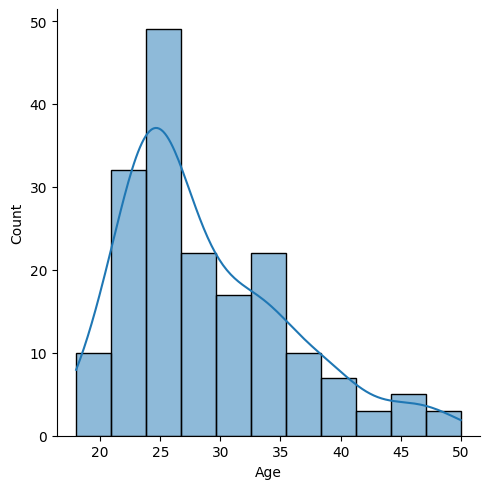

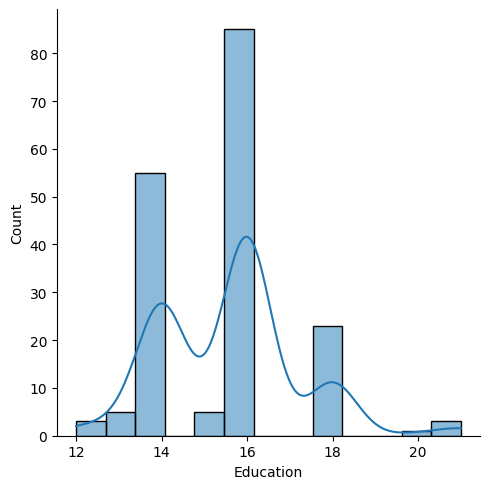

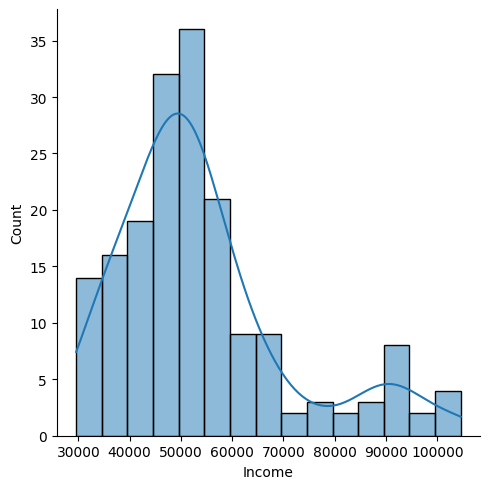

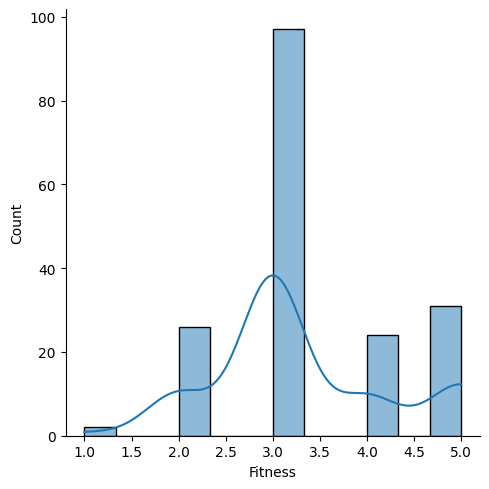

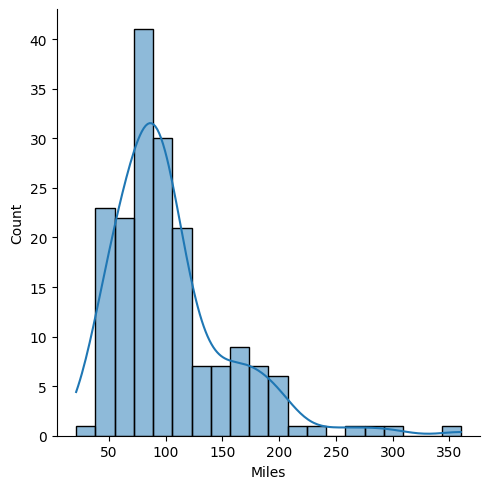

In [25]:
import seaborn as sns
import plotly.express as px
sns.displot(df["Age"],kde=True)
plt.show()
sns.displot(df["Education"],kde=True)
plt.show()
sns.displot(df["Income"],kde=True)
plt.show()
sns.displot(df["Fitness"],kde=True)
plt.show()
sns.displot(df["Miles"],kde=True)
plt.show()

#import plotly.express as px
#fig = px.box(df, y="Age",width=width,height=height)
#fig.show()
#fig = px.box(df, y="Education",width=width,height=height)
#fig.show()
#fig = px.box(df, y="Income",width=width,height=height)
#fig.show()
#fig = px.box(df, y="Fitness",width=width,height=height)
#fig.show()
#fig = px.box(df, y="Miles",width=width,height=height)
#fig.show()

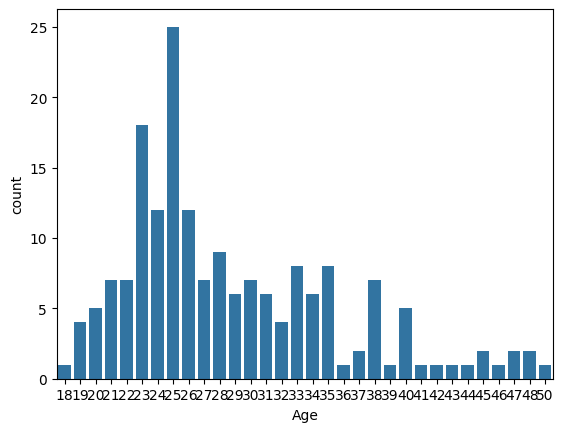

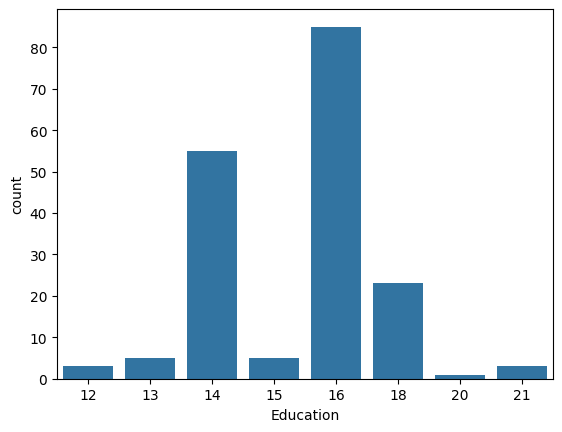

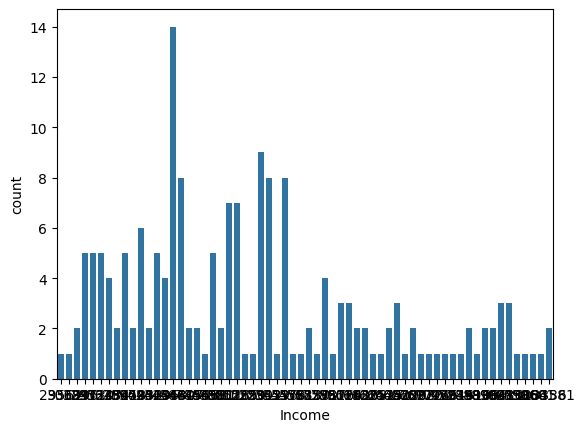

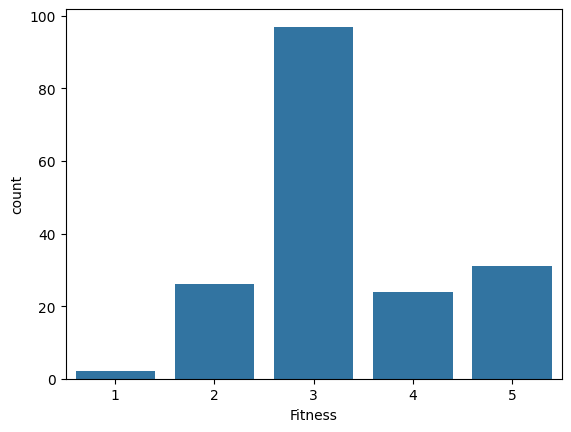

In [26]:
sns.countplot(data=df, x="Age")
plt.show()
sns.countplot(data= df, x="Education")
plt.show()
sns.countplot(data=df, x="Income")
plt.show()
sns.countplot(data=df, x="Fitness")
plt.show()

1. Miles
•	Distribution: The histogram shows a right-skewed distribution with a peak around 75-100 miles.
occurrences.
2. Fitness
•	Distribution: This graph displays a bimodal distribution with peaks at 2.5 and 3.5.
3. Income
•	Distribution: The income data shows a left-skewed distribution with a prominent peak at around $50,000.
4. Education
•	Distribution: This histogram is bimodal, with spikes at around 12 years (high school) and 16 years (bachelor’s degree).
5. Age
•	Distribution: The age distribution is slightly skewed to the left, with a peak around 25 years.



**BOX plots**


In [27]:
import plotly.express as px
fig = px.box(df, y="Age",width=width,height=height)
#sns.boxplot(df["Age"])
#plt.show()
#sns.boxplot(df["Education"])
#plt.show()
#sns.boxplot(df["Income"])
#plt.show()
#sns.boxplot(df["Fitness"])
#plt.show()
#sns.boxplot(df["Miles"])
#plt.show()
fig.show()
fig = px.box(df, y="Education",width=width,height=height)
fig.show()
fig = px.box(df, y="Income",width=width,height=height)
fig.show()
fig = px.box(df, y="Fitness",width=width,height=height)
fig.show()
fig = px.box(df, y="Miles",width=width,height=height)
fig.show()

1. Miles
The median mileage is around 100 miles.
The IQR spans from approximately 75 to 125 miles, indicating that the central 50% of the data is concentrated in this range.
There are several outliers exceeding 200 miles, suggesting a few instances of significantly longer distances compared to the majority.
2. Fitness
The median fitness score is 3.5, indicating a generally moderate fitness level among the population.
The scores range between 3.0 and 4.0, with most individuals scoring within this range.
There are a few lower outliers (scores of 1.0 and 2.0), suggesting some individuals may have poor fitness levels, but the bulk have scores on the higher end.
3. Income Median income is approximately 50.000 USD.
The IQR spans from around 40,000 to 60,000 USD, indicating that most incomes are clustered within this range.
A number of high-income outliers (over $90,000) indicate a small group earning significantly more than the majority.
4. Education
The median years of education is about 16 years, typically corresponding to a bachelor’s degree.
The IQR ranges from 14 to 18 years, meaning that most individuals have between two years of college and a bachelor’s degree.
Few outliers are present at higher levels of education, indicating a handful of individuals with significantly more education (beyond 20 years).
5. Age
The median age is around 30 years.
The IQR extends from approximately 25 to 35 years, indicating that the population is relatively young, with most individuals falling within this age range.
A few outliers exist in the higher age range (over 40 years), but they represent a small segment of the overall data.


Count Plots, Categorical Features

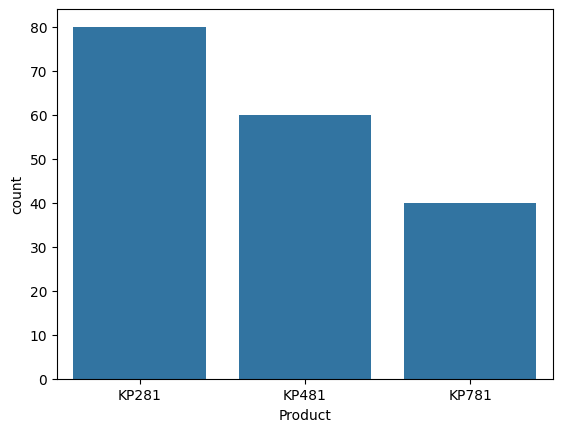

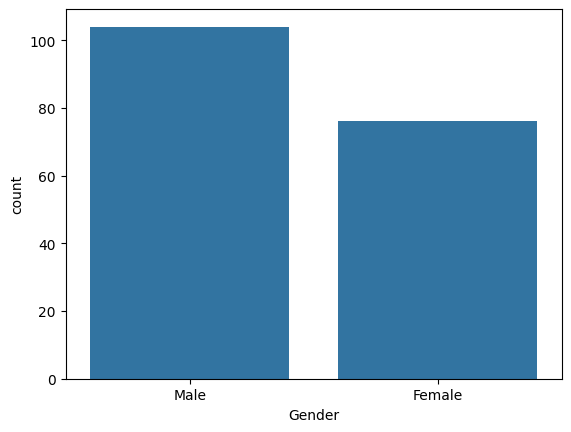

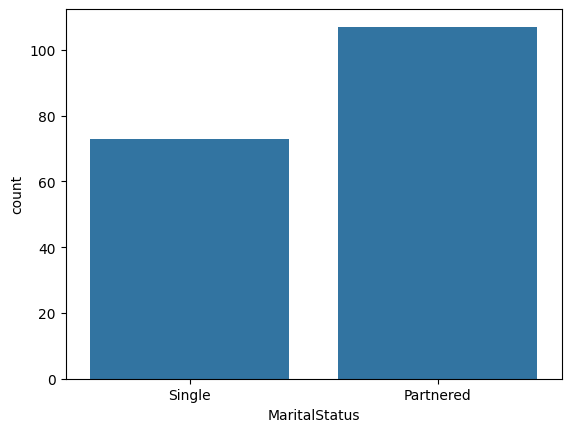

In [28]:
import seaborn as sns
import plotly.express as px
sns.countplot(data=df, x="Product")
plt.show()
sns.countplot(data= df, x="Gender")
plt.show()
sns.countplot(data=df, x="MaritalStatus")
plt.show()

•	The demographic data indicates a skew towards partnered males who show a preference for the product KP281.

•	These patterns point to potential areas for focused marketing efforts, as engaging partnered individuals (especially males) may yield more significant returns if targeting the KP281 product


**Bivariate Analysis:  
o Check features eƯect on the product purchased e.g.  
o Product vs Gender  
o Product vs MaritalStatus  
o Product vs Age**  


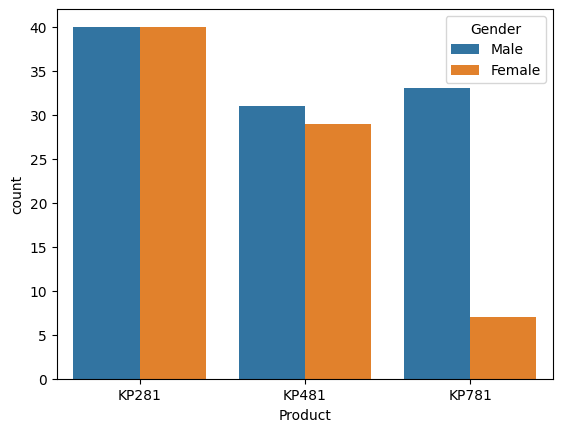

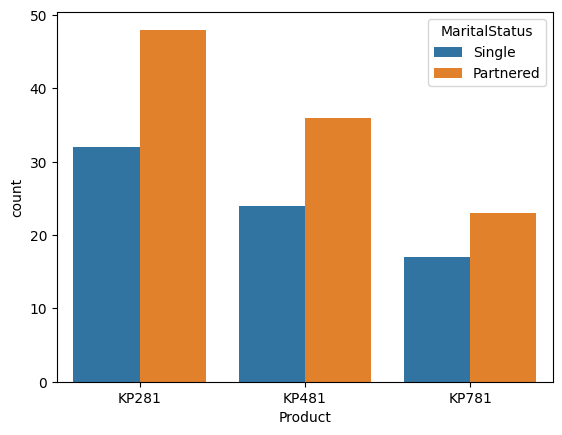

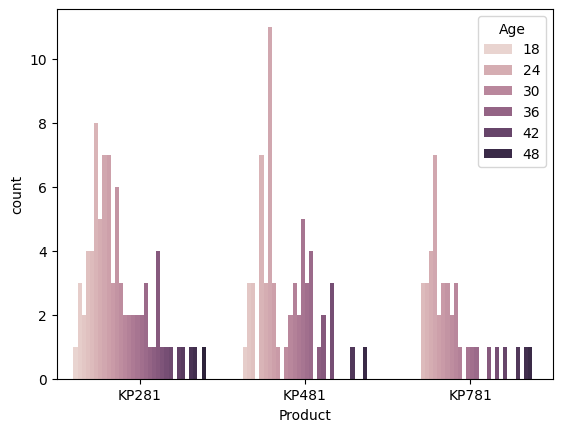

In [29]:
import seaborn as sns
import plotly.express as px
sns.countplot(data=df, x="Product", hue="Gender")
plt.show()
sns.countplot(data=df, x="Product", hue="MaritalStatus")
plt.show()
sns.countplot(data=df, x="Product", hue="Age")
plt.show()

•	KP281 is favored by younger individuals and partnered consumers. It may be beneficial to design marketing strategies that target younger demographics, focusing on relationship-oriented messaging.

•	KP481 appears to appeal to a diverse audience but with lower engagement than KP281. Enhancing its visibility could help it capture more market share.




**Multivariate Analysis:  
o Create pairplots to show relationship of features**


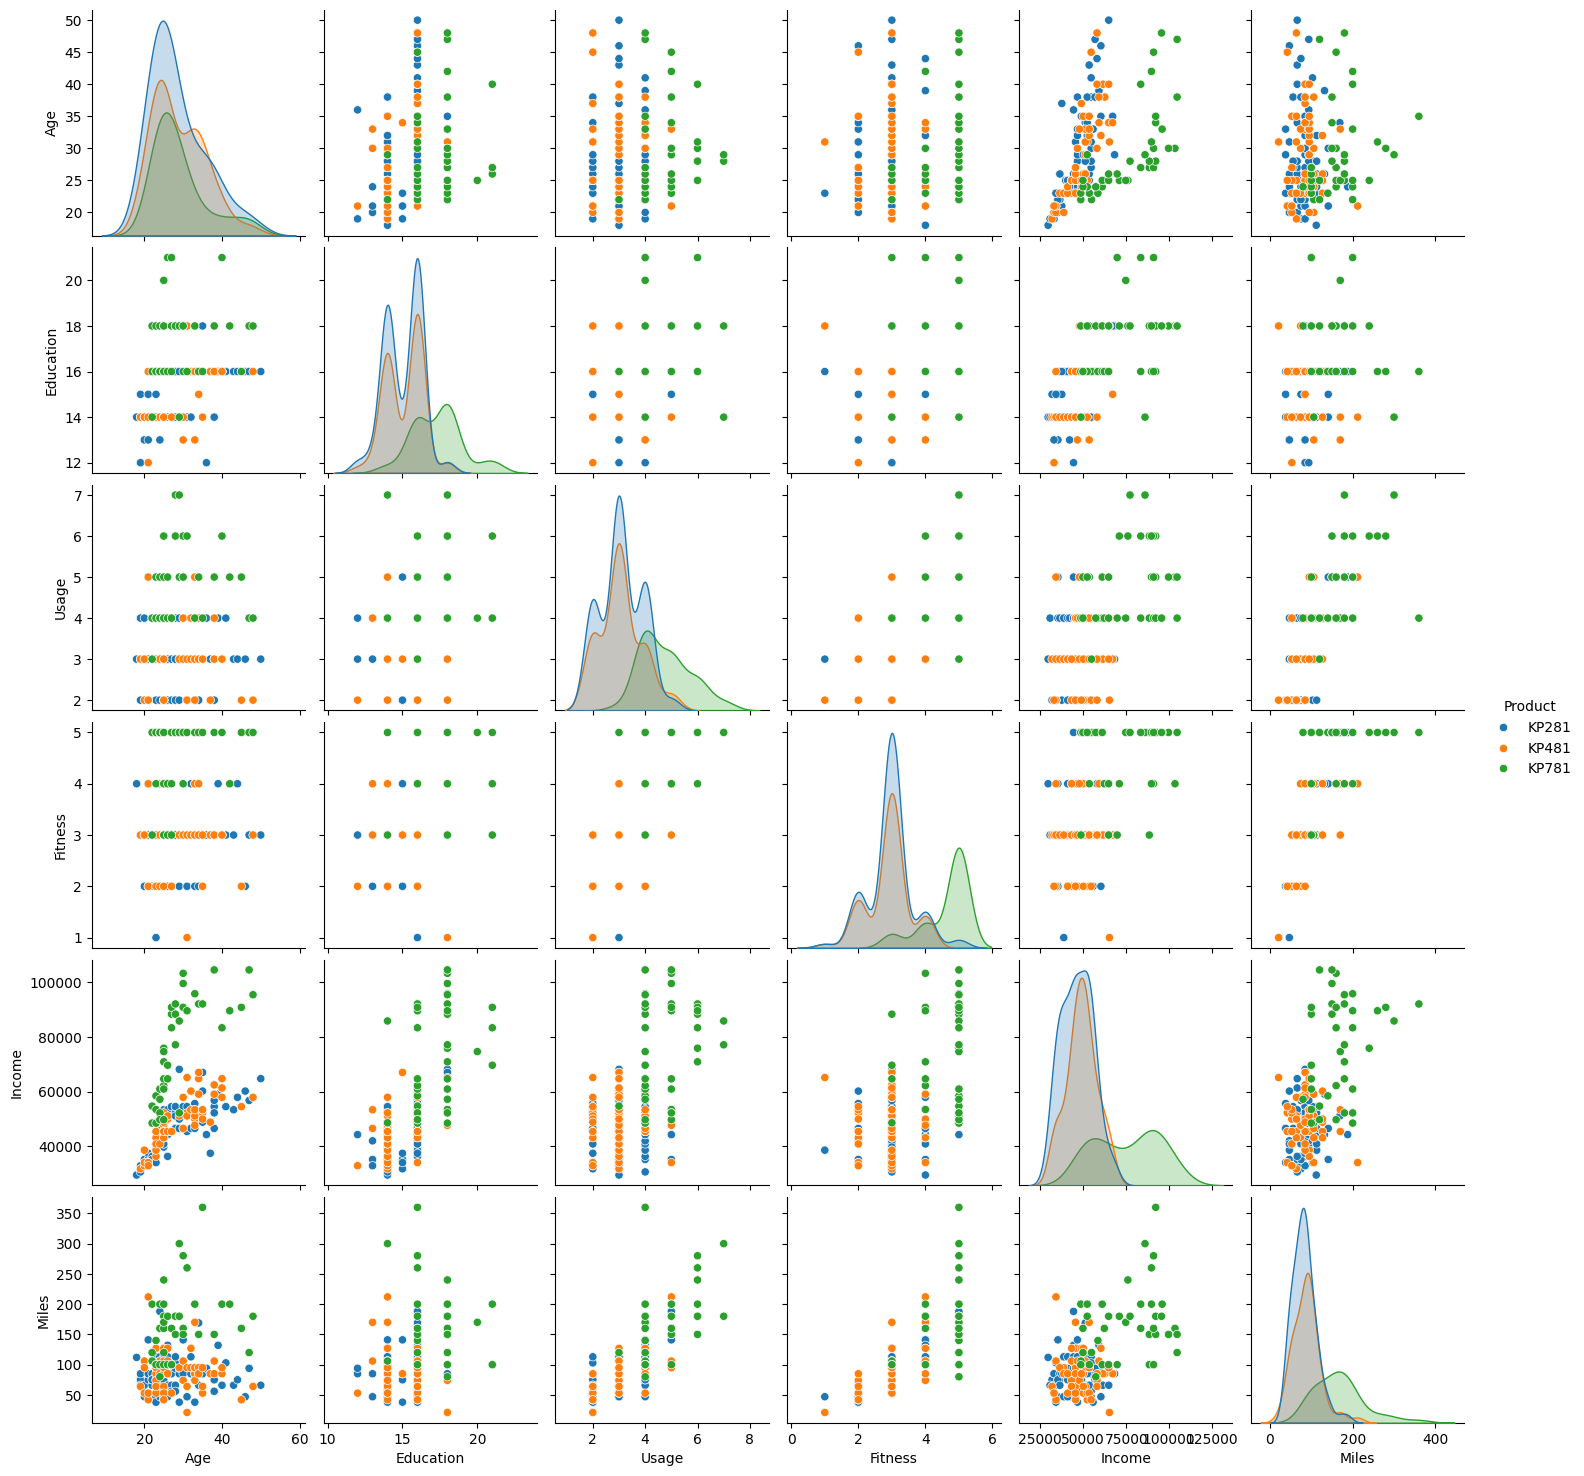

In [30]:
sns.pairplot(df, hue="Product")
plt.show()

•	KP281 stands out with a strong correlation to several positive indicators (overall fitness, education, and income), suggesting it may be a premium product with a well-targeted audience

•There is a trend showing older, more educated individuals tend to prefer KP281, suggesting effective marketing could be focused on health and fitness benefits for this demographic.

•	Product KP781 may require further investigation to understand its lower engagement levels and how to improve its appeal.


**Correlation Analysis:  
 Show the correlation matrix on heatmap and write your observation of findings in  few lines**

In [31]:
df.corr('pearson', numeric_only= True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [32]:
df.corr('kendall',numeric_only= True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.258464,0.026296,0.049028,0.530537,0.018122
Education,0.258464,1.000000,0.326301,0.338005,0.496594,0.238748
Usage,0.026296,0.326301,1.000000,0.570850,0.284609,0.642191
Fitness,0.049028,0.338005,0.570850,1.000000,0.307114,0.701554
Income,0.530537,0.496594,0.284609,0.307114,1.000000,0.249820
Miles,0.018122,0.238748,0.642191,0.701554,0.249820,1.000000


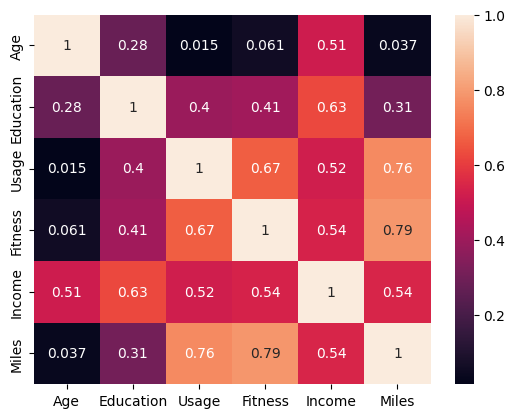

In [33]:
sns.heatmap(df.corr('pearson',numeric_only=True), annot=True)
plt.show()

•	Health and Economic Factors: The strong correlation between fitness and income underscores the potential impact of financial resources on health outcomes and fitness levels.

•	Engagement Patterns: The relationship between usage and miles suggests that active users of the product are more likely to engage in physical activities, which may be a focal point for marketing efforts.

•	Demographic Targeting: The weak correlation of age with other variables may indicate that marketing strategies should be more focused on lifestyle and health factors rather than age alone.


**6. Outlier Detection:  
 Check for the outliers by using the IQR method.**


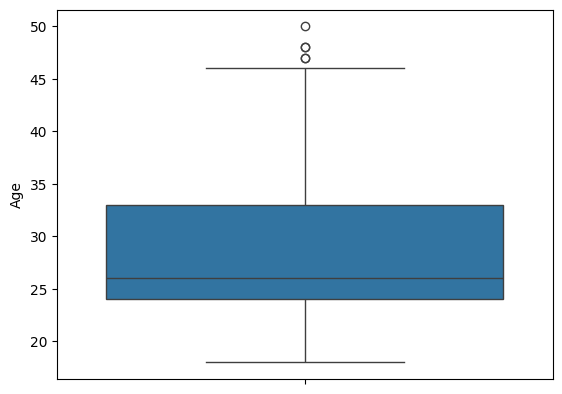

In [34]:

sns.boxplot(df["Age"])
plt.show()

In [35]:
percentile25 = df['Age'].quantile(0.25)

percentile75 = df['Age'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr

lower_limit = percentile25 - 1.5 * iqr

upper_limit, lower_limit

new_df = df[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

new_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [36]:
percentile25 = df['Income'].quantile(0.25)

percentile75 = df['Income'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr

lower_limit = percentile25 - 1.5 * iqr

upper_limit, lower_limit

new_df = df[(df['Income'] > upper_limit) | (df['Income'] < lower_limit)]

new_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [37]:
percentile25 = df['Miles'].quantile(0.25)

percentile75 = df['Miles'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr

lower_limit = percentile25 - 1.5 * iqr

upper_limit, lower_limit

new_df = df[(df['Miles'] > upper_limit) | (df['Miles'] < lower_limit)]

new_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


In [38]:
percentile25 = df['Education'].quantile(0.25)

percentile75 = df['Education'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr

lower_limit = percentile25 - 1.5 * iqr

upper_limit, lower_limit

new_df = df[(df['Education'] > upper_limit) | (df['Education'] < lower_limit)]

new_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


<Axes: ylabel='Age'>

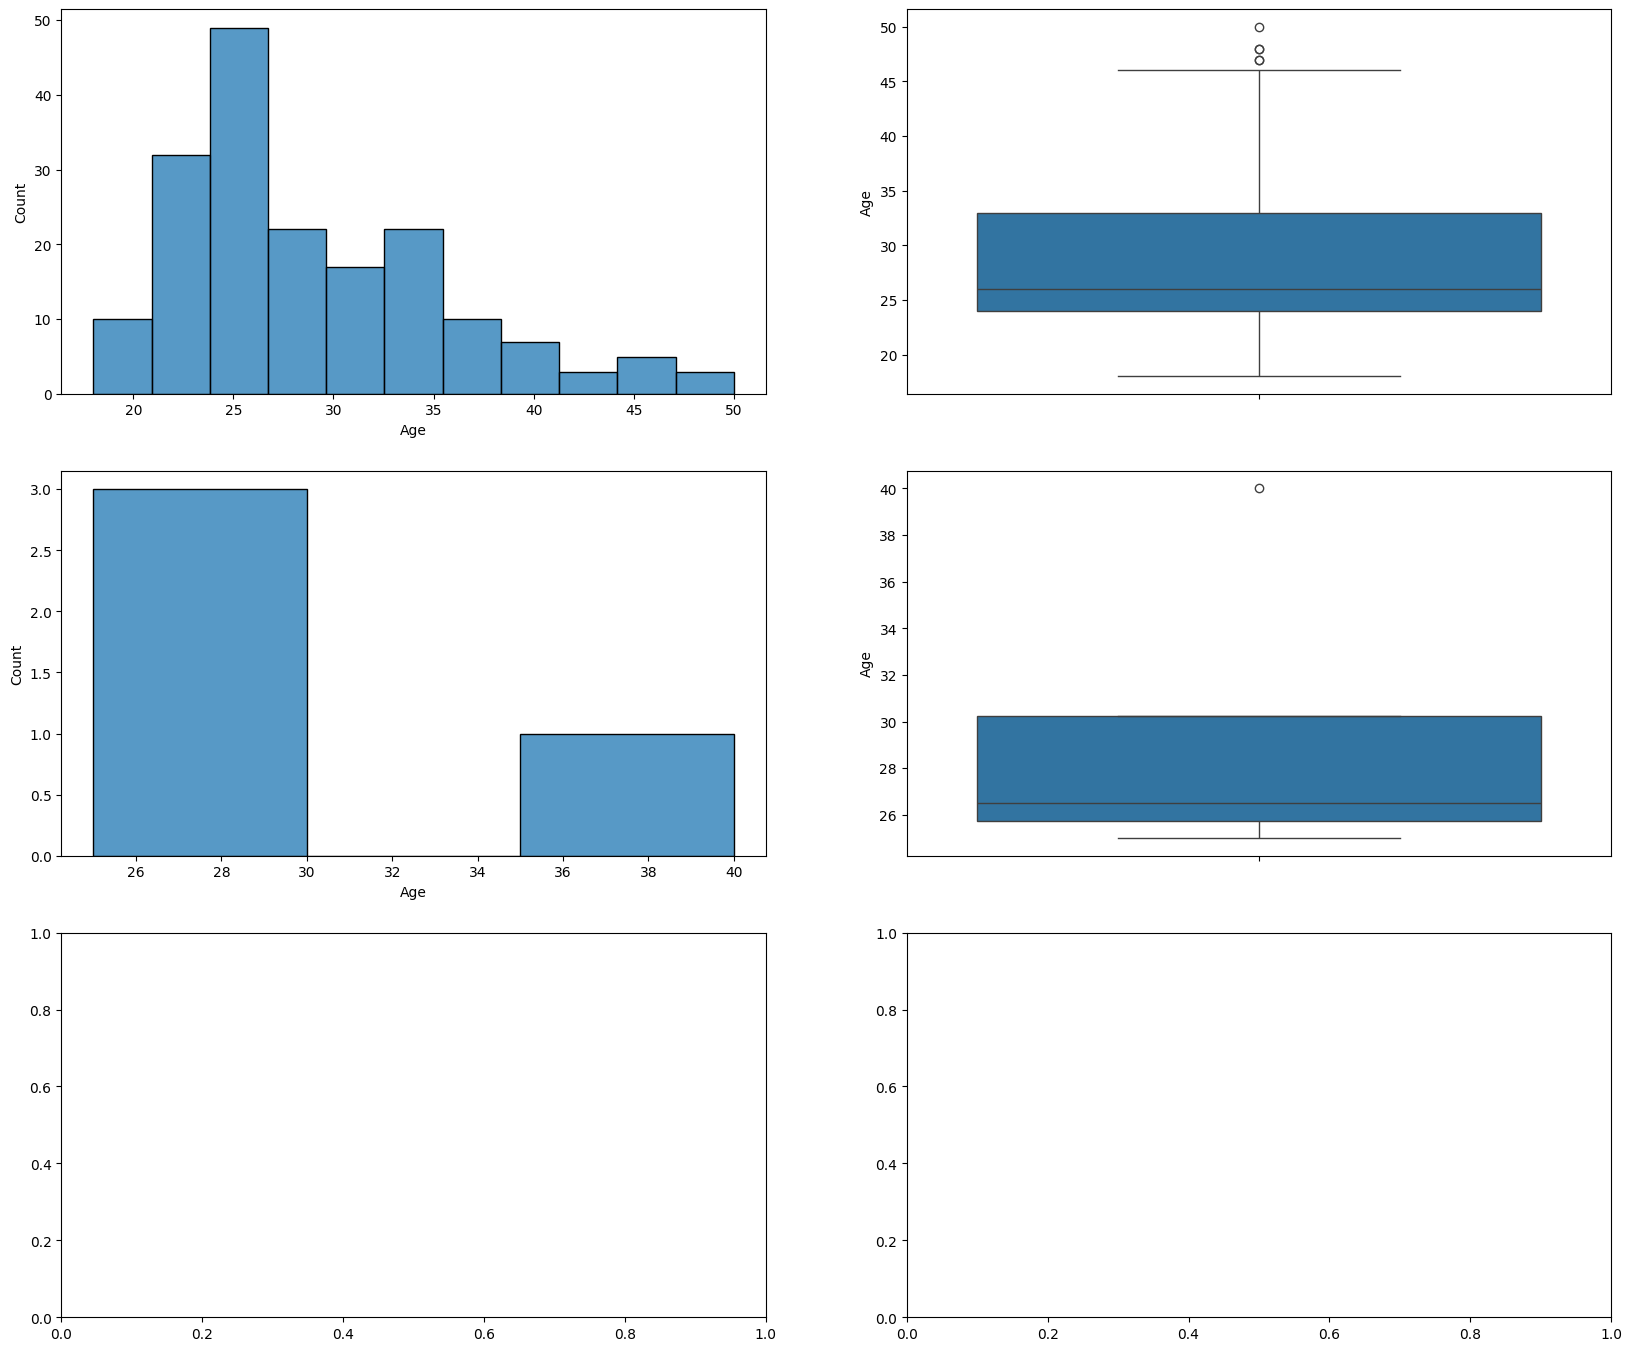

In [39]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)
#plt.title("ORIGINAL DISTRIBUTION")
sns.histplot(df['Age'], ax=axis[0, 0])
sns.boxplot(df['Age'], ax=axis[0, 1])
#plt.title("TRIMMED DISTRIBUTION")
sns.histplot(new_df['Age'], ax=axis[1, 0])
sns.boxplot(new_df['Age'], ax=axis[1, 1])
#plt.show()


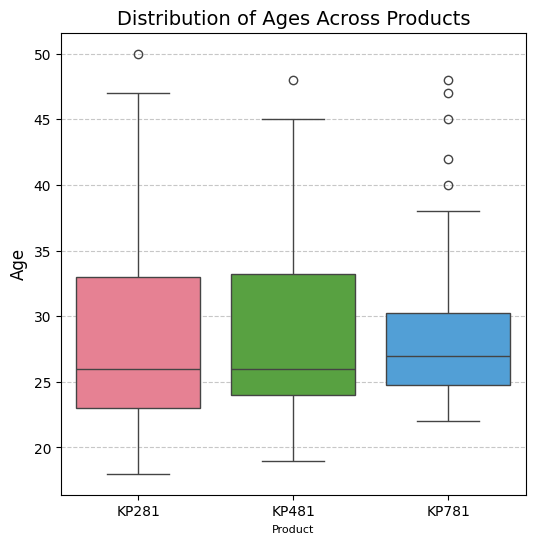

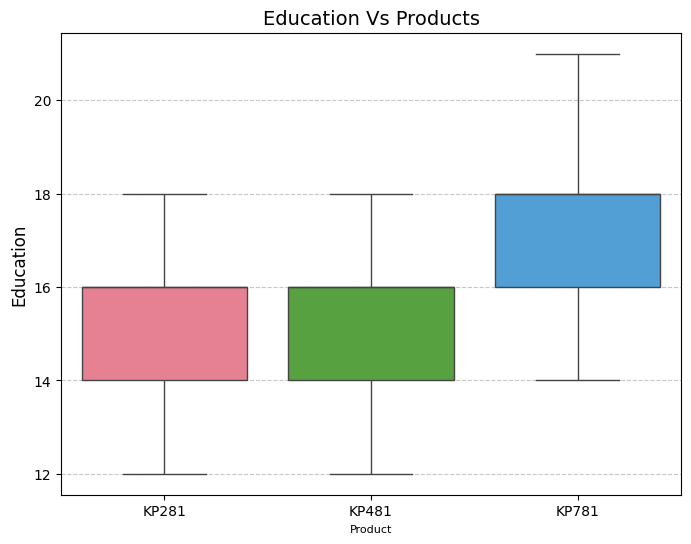

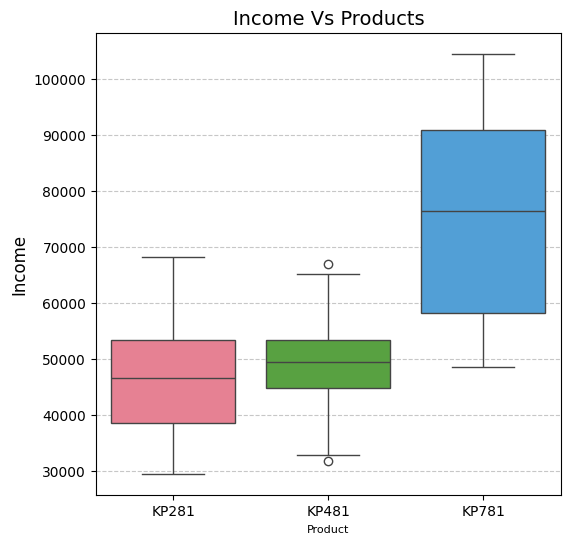

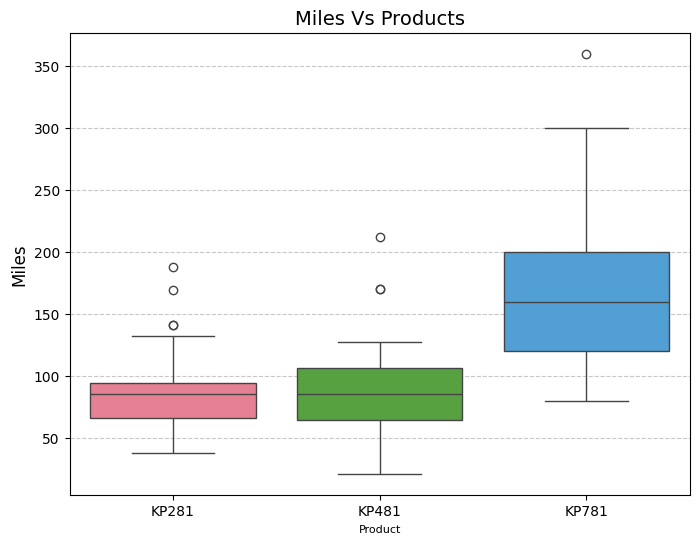

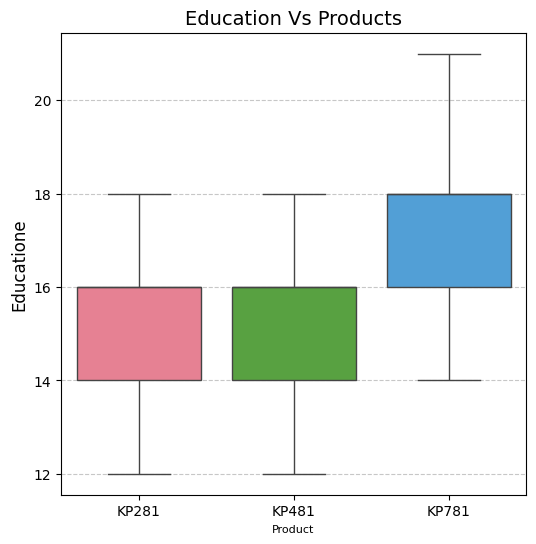

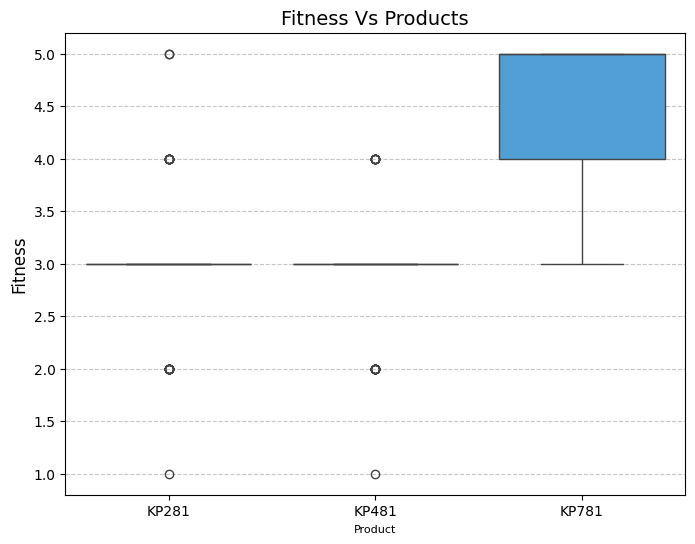

In [40]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Product', y='Age', hue='Product', data=df, palette="husl", dodge=False, legend=False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Distribution of Ages Across Products", fontsize=14)
plt.xlabel("Product", fontsize=8)
plt.ylabel("Age", fontsize=12)

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Education', hue='Product', data=df, palette="husl", dodge=False, legend=False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Education Vs Products", fontsize=14)
plt.xlabel("Product", fontsize=8)
plt.ylabel("Education", fontsize=12)

plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x='Product', y='Income', hue='Product', data=df, palette="husl", dodge=False, legend=False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Income Vs Products", fontsize=14)
plt.xlabel("Product", fontsize=8)
plt.ylabel("Income", fontsize=12)

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Miles', hue='Product', data=df, palette="husl", dodge=False, legend=False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Miles Vs Products", fontsize=14)
plt.xlabel("Product", fontsize=8)
plt.ylabel("Miles", fontsize=12)

plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x='Product', y='Education', hue='Product', data=df, palette="husl", dodge=False, legend=False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Education Vs Products", fontsize=14)
plt.xlabel("Product", fontsize=8)
plt.ylabel("Educatione", fontsize=12)

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Fitness', hue='Product', data=df, palette="husl", dodge=False, legend=False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Fitness Vs Products", fontsize=14)
plt.xlabel("Product", fontsize=8)
plt.ylabel("Fitness", fontsize=12)

plt.show()

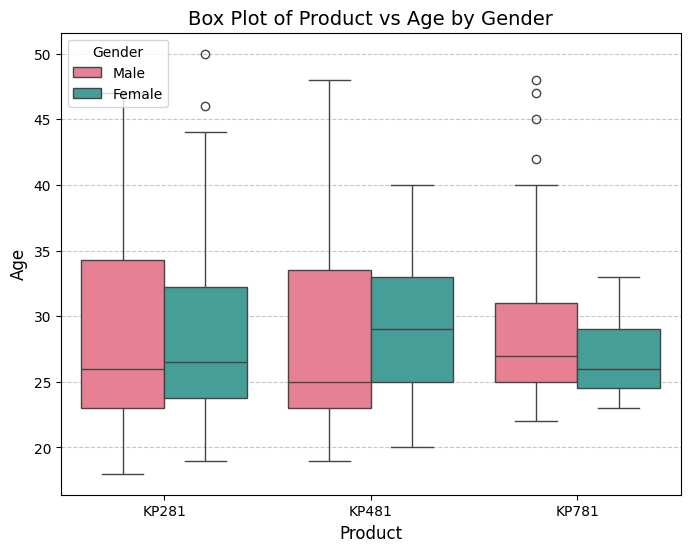

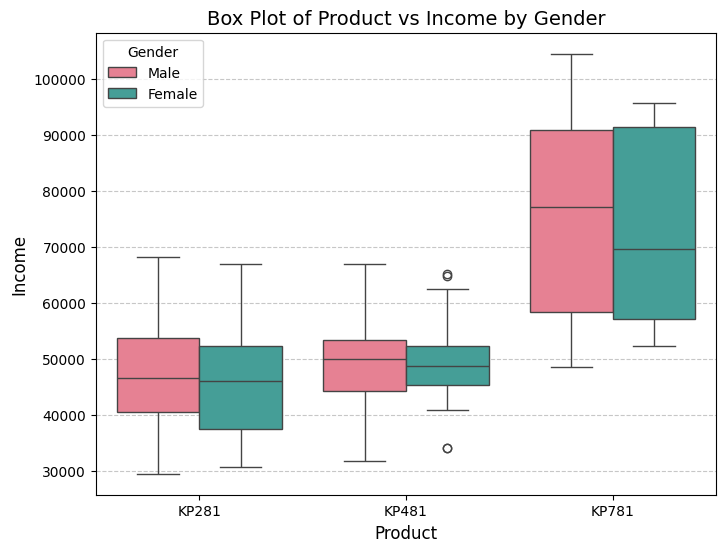

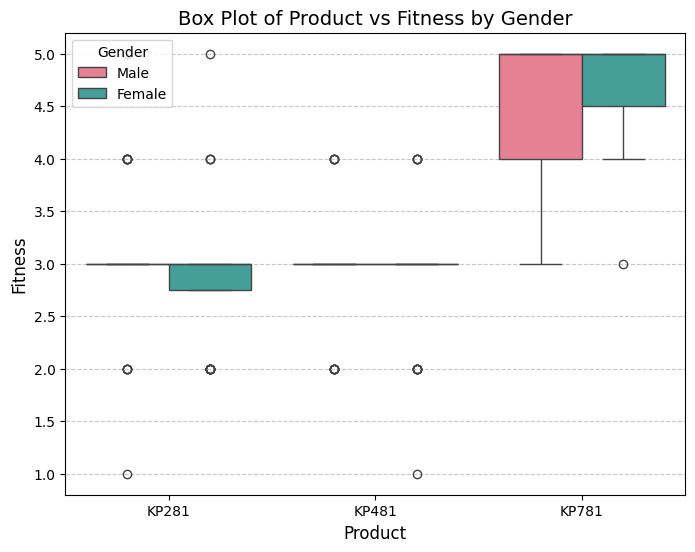

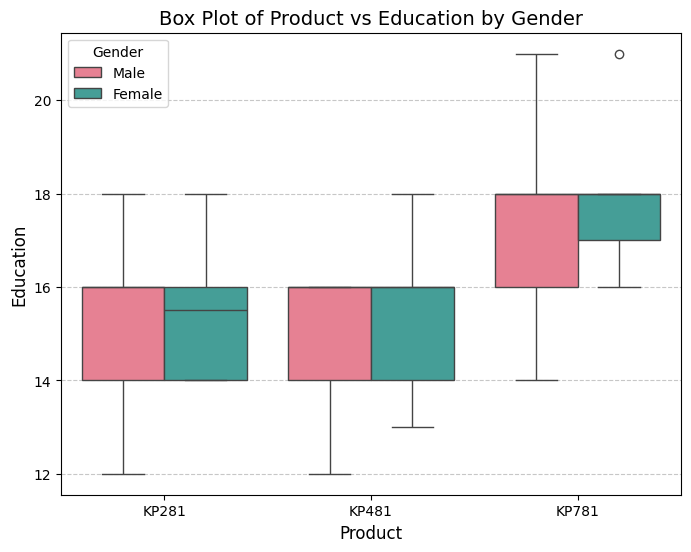

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Age', hue='Gender', data=df, palette="husl")

# Customize the plot
plt.title("Box Plot of Product vs Age by Gender", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Gender", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Income', hue='Gender', data=df, palette="husl")

# Customize the plot
plt.title("Box Plot of Product vs Income by Gender", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.legend(title="Gender", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Fitness', hue='Gender', data=df, palette="husl")

# Customize the plot
plt.title("Box Plot of Product vs Fitness by Gender", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.legend(title="Gender", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Education', hue='Gender', data=df, palette="husl")

# Customize the plot
plt.title("Box Plot of Product vs Education by Gender", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Education", fontsize=12)
plt.legend(title="Gender", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

•	Product KP281 appeals mainly to fitness-oriented, moderately educated, and younger users.

•	KP481 seems to attract less active individuals with lower incomes and education.

•	KP781 stands out with high-income, highly educated, and active users, representing a potential market segment for premium offerings.


#7. Conditional Probabilities:

**What percent of customers have purchased KP281, KP481, or KP781?**

In [42]:
print(df['Product'].value_counts())
len(df)

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


180

In [43]:
perc = df['Product'].value_counts(normalize=True) * 100
print(perc)

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64


In [44]:
print(df['Product'].value_counts())
len(df)

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


180

PRODUCT- GENDER  Precentages and Frequencies

In [45]:
product_gender = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

print("\n1. Frequency Table - Product vs Gender:\n")
print(product_gender)


1. Frequency Table - Product vs Gender:

Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180


In [46]:
frequency_table = df.groupby(['Product', 'Gender']).size().reset_index(name='Count')
print(frequency_table)

# 1. Percentage of Male customers purchasing a treadmill
male_treadmill_count = frequency_table[(frequency_table['Gender'] == 'Male')]['Count'].sum()
male_treadmill_percentage = (male_treadmill_count / len(df)) * 100
male_pct = round(male_treadmill_percentage,2)
print("Percentage of Male customers purchasing a treadmill:",male_pct,"%")

# 2. Percentage of Female customers purchasing KP781 treadmill
female_kp781_count = frequency_table[(frequency_table['Product'] == 'KP781') & (frequency_table['Gender'] == 'Female')]['Count'].sum()
female_kp781_percentage = (female_kp781_count / len(df)) * 100
f_kp781_pct = round(female_kp781_percentage,2)
print("Percentage of Female customers purchasing KP781 treadmill:",f_kp781_pct, "%")

# 3. Probability of a customer being Female given that Product is KP281
kp281_total = frequency_table[frequency_table['Product'] == 'KP281']['Count'].sum()
female_kp281_count = frequency_table[(frequency_table['Product'] == 'KP281') & (frequency_table['Gender'] == 'Female')]['Count'].sum()
female_kp281_prob = female_kp281_count / kp281_total
print("Probability of a customer being Female given that Product is KP281: ",female_kp281_prob)

  Product  Gender  Count
0   KP281  Female     40
1   KP281    Male     40
2   KP481  Female     29
3   KP481    Male     31
4   KP781  Female      7
5   KP781    Male     33
Percentage of Male customers purchasing a treadmill: 57.78 %
Percentage of Female customers purchasing KP781 treadmill: 3.89 %
Probability of a customer being Female given that Product is KP281:  0.5


In [47]:
age_filtered = df[(df['Age'] >= 20) & (df['Age'] <= 30)]

# Count customers in the age range by Product
age_filtered_counts = age_filtered.groupby('Product').size().reset_index(name='Count')

# Calculate the percentage of customers in their 20s and 30s
age_filtered_counts['Percentage'] = (age_filtered_counts['Count'] / len(df)) * 100

# Display results
print("Percentage of customers with Age between 20s and 30s among all customers:")
print(age_filtered_counts)

Percentage of customers with Age between 20s and 30s among all customers:
  Product  Count  Percentage
0   KP281     51   28.333333
1   KP481     34   18.888889
2   KP781     30   16.666667


In [48]:
#high_income= df[ df['Income']>= 50000 ]
#med_income = df[df['Income'] >= 25000]
#low_income = df[df['Income'] <= 25000]
#df['Income_Category'] = ['High' if income >= 50000 else 'Medium' if income >= 25000 else 'Low' for income in df['Income']]
#Income_Cat = df['Income_Category'].groupby('Product').size().reset_index(name='Count')
#print(Income_Cat)

#pdincome= pd.crosstab(index=df['Product'], columns=[df['Income_Category']],margins=True)
#pdincome
#low_income_customers = df[df['Income_Category'] == 'Low']
#percentage_low_income_treadmill = len(low_income_customers) / len(df) * 100
#print(f"Percentage of low-income customers: {percentage_low_income_treadmill}%")

In [52]:
df['Income_Category'] = ['High' if income >= 80000 else 'Medium' if income >= 50000 else 'Low' for income in df['Income']] #Classification of incomes in High, Middle and low


low_customers = df[df['Income_Category'] == 'Low']
per_low_income = len(low_customers) / len(df) * 100
print("Percentage of low-income customers buying a treadmill:",round(per_low_income,2),"%")

kp781_customers = df[df['Product'] == 'KP781']
high_kp781 = kp781_customers[kp781_customers['Income_Category'] == 'High']
per_high_income_kp781 = len(high_kp781) / len(kp781_customers) * 100
print("Percentage of high-income customers buying a treadmill given the product is KP781: ",per_high_income_kp781,"%")


Percentage of low-income customers buying a treadmill: 46.11 %
Percentage of high-income customers buying a treadmill given the product is KP781:  47.5 %


In [50]:

fitness_level_5_customers = df[df['Fitness'] == 5]
per_fit_level_5 = len(fitness_level_5_customers) / len(df) * 100
print("Percentage of customers that have fitness level 5: ",round(per_fit_level_5,2),"%")


kp781_customers = df[df['Product'] == 'KP781']
fitness_level_5_in_kp781 = kp781_customers[kp781_customers['Fitness'] == 5]
per_level5_kp781 = len(fitness_level_5_in_kp781) / len(kp781_customers) * 100
print("Percentage of customers with fitness level 5 buying KP781 treadmill: ",per_level5_kp781,"%")

Percentage of customers that have fitness level 5:  17.22 %
Percentage of customers with fitness level 5 buying KP781 treadmill:  72.5 %


In [51]:
partnered_customers = df[df['MaritalStatus'] == 'Partnered']
per_partnered = len(partnered_customers) / len(df) * 100
print("Percentage of customers who are partnered and using treadmills: ",round(per_partnered,2),"%")

Percentage of customers who are partnered and using treadmills:  59.44 %


Detailed Analysis is available in seperate Report.